<h2 align="center"> Statistical Learning 1 </h2>
<h2 align="center"> Proyecto #2 </h2>

# Notebook #1

## Análisis Exploratorio de los Datos
** Marvin Diaz Carnet 9516008 **

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import norm

In [24]:
df = pd.read_csv('C:/UCI HAR Dataset/Human_Activity_Recognition_Using_Smartphones_Data.csv')


In [26]:
filas, columnas = df.shape
print(filas,columnas)

10299 562


In [28]:
df.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [29]:
df.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


Los datos tienen escala de -1 a 1

In [32]:
df.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [33]:
df.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Existen diferentes actividades

In [34]:
df.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

<AxesSubplot:>

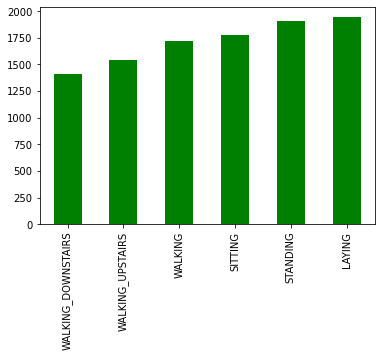

In [35]:
df['Activity'].value_counts().sort_values().plot(kind = 'bar', color = 'green')

In [36]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [37]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [38]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
tBodyAcc-mean()-X,10292
tBodyAcc-mean()-Y,10299
tBodyAcc-mean()-Z,10293
tBodyAcc-std()-X,10295
tBodyAcc-std()-Y,10297
...,...
"angle(tBodyGyroJerkMean,gravityMean)",10299
"angle(X,gravityMean)",10299
"angle(Y,gravityMean)",10299


### Analisis de Correlación

In [45]:
# Calculando los valores de correlación
feature_cols = df.columns[:-1]
corr_values = df[feature_cols].corr()


tril_index = np.tril_indices_from(corr_values)

# Haciendo los valores faltantes NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Convirtiendo la data a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Obteniendo valores absolutos
corr_values['abs_correlation'] = corr_values.correlation.abs()

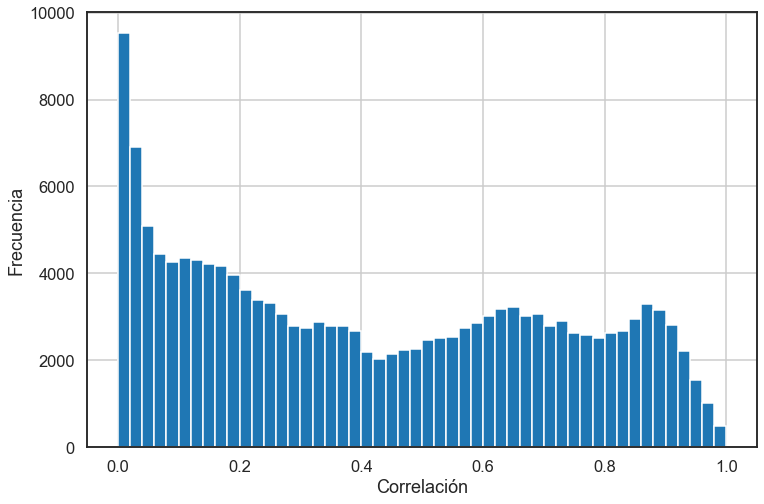

In [46]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Correlación', ylabel='Frecuencia');

In [47]:
# VAlores con mayor correlación
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')


,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [75]:
categorical_variables = df.Activity

In [76]:
categorical_variables

0                STANDING
1                STANDING
2                STANDING
3                STANDING
4                STANDING
               ...       
10294    WALKING_UPSTAIRS
10295    WALKING_UPSTAIRS
10296    WALKING_UPSTAIRS
10297    WALKING_UPSTAIRS
10298    WALKING_UPSTAIRS
Name: Activity, Length: 10299, dtype: object

In [84]:
df.groupby("Activity").mean()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,0.268649,-0.018318,-0.107436,-0.960932,-0.943507,-0.948069,-0.963395,-0.944099,-0.947261,-0.911610,...,0.165728,-0.342490,-0.658640,0.010366,0.016013,0.022788,0.009191,0.520261,-0.435944,-0.427749
SITTING,0.273060,-0.012690,-0.105517,-0.983446,-0.934881,-0.938982,-0.985280,-0.934798,-0.936671,-0.926703,...,0.177739,-0.384740,-0.686795,0.012034,0.002458,0.013413,-0.033260,-0.706042,0.006140,-0.089532
STANDING,0.279153,-0.016152,-0.106587,-0.984435,-0.932509,-0.939914,-0.987205,-0.933875,-0.937739,-0.921265,...,0.084865,-0.343769,-0.654989,0.006991,0.010397,0.004614,0.015957,-0.774143,0.209818,0.031743
WALKING,0.276337,-0.017907,-0.108882,-0.314644,-0.023583,-0.273921,-0.352470,-0.055491,-0.274098,-0.113458,...,0.130806,-0.071308,-0.400268,0.014918,-0.007011,0.011332,-0.019443,-0.761886,0.218599,0.059771
WALKING_DOWNSTAIRS,0.288137,-0.016312,-0.105762,0.100766,0.059549,-0.190805,0.032426,0.003907,-0.214569,0.417152,...,0.095759,-0.277020,-0.618394,-0.039692,-0.018665,0.203588,-0.076029,-0.780873,0.200189,0.055866
WALKING_UPSTAIRS,0.262295,-0.025923,-0.120538,-0.237990,-0.016033,-0.175450,-0.297094,-0.030865,-0.172811,-0.015003,...,0.094112,-0.361533,-0.682468,0.035371,0.006652,-0.129903,0.036432,-0.637980,0.278642,0.122794


In [85]:
df[["Activity"]].describe()

,Activity
count,10299
unique,6
top,LAYING
freq,1944


In [56]:
numeric_variables = list(set(df.columns))

In [57]:
numeric_variables

['tBodyGyro-arCoeff()-X,2',
 'fBodyGyro-bandsEnergy()-49,64.1',
 'tBodyAcc-entropy()-X',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-17,32',
 'tBodyAcc-arCoeff()-Z,1',
 'fBodyAccJerk-mad()-X',
 'fBodyAcc-bandsEnergy()-1,8.2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyGyro-min()-X',
 'tBodyGyroMag-min()',
 'fBodyBodyGyroMag-maxInds',
 'tBodyAccJerk-std()-Z',
 'fBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAccJerk-entropy()-Y',
 'tBodyAccJerk-mad()-Z',
 'tBodyAccJerk-arCoeff()-X,4',
 'tBodyAccJerk-correlation()-X,Y',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-33,40',
 'fBodyAcc-meanFreq()-Z',
 'fBodyAcc-mad()-Y',
 'tBodyAcc-iqr()-X',
 'tBodyGyro-entropy()-X',
 'tBodyAccJerk-max()-Y',
 'tGravityAcc-std()-Z',
 'tBodyGyro-correlation()-X,Y',
 'fBodyBodyAccJerkMag-skewness()',
 'tBodyGyro-entropy()-Z',
 'tBodyGyro-energy()-X',
 'tBodyGyroMag-arCoeff()4',
 'fBodyAccJerk-std()-Y',
 'fBodyGyro-bandsEnergy()-33,48',
 'fBodyGyro-bandsEnergy()-49,56.2',
 'fBody